# Bone Fracture Prediction


### Import all the necessary libraries

In [1]:
! unzip 'Bone fracture data.zip'

Streaming output truncated to the last 5000 lines.
  inflating: Bone fracture data/train/fractured/99-rotated3-rotated1-rotated2.jpg  
  inflating: Bone fracture data/train/fractured/99-rotated3-rotated1-rotated3.jpg  
  inflating: Bone fracture data/train/fractured/99-rotated3-rotated1.jpg  
  inflating: Bone fracture data/train/fractured/99-rotated3-rotated2-rotated1.jpg  
  inflating: Bone fracture data/train/fractured/99-rotated3-rotated2-rotated2.jpg  
  inflating: Bone fracture data/train/fractured/99-rotated3-rotated2-rotated3.jpg  
  inflating: Bone fracture data/train/fractured/99-rotated3-rotated2.jpg  
  inflating: Bone fracture data/train/fractured/99-rotated3-rotated3-rotated1.jpg  
  inflating: Bone fracture data/train/fractured/99-rotated3-rotated3-rotated2.jpg  
  inflating: Bone fracture data/train/fractured/99-rotated3-rotated3-rotated3.jpg  
  inflating: Bone fracture data/train/fractured/99-rotated3-rotated3.jpg  
  inflating: Bone fracture data/train/fractured/99-r

In [2]:
import os
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import classification_report, confusion_matrix

import os
import shutil
from sklearn.model_selection import train_test_split

In [3]:
dataset = tf.keras.preprocessing.image_dataset_from_directory(
    r'/content/Bone fracture data',
    shuffle=True,
    image_size = (373, 454),
    batch_size = 64
)

Found 9463 files belonging to 2 classes.


In [4]:
class_names = dataset.class_names

class_names

['train', 'val']

In [5]:
print("No.of Batches:",len(dataset))

No.of Batches: 148


In [6]:
# Define paths for training and validation directories
train_dir = '/content/Bone fracture data/train'  # Should contain two subfolders (fracture, non_fracture)
val_dir = '/content/Bone fracture data/val'  # Should contain two subfolders (fracture, non_fracture)

# Image augmentation and rescaling for the training set
train_datagen = ImageDataGenerator(rescale=1./255, rotation_range=15, zoom_range=0.2,
                                   shear_range=0.2, horizontal_flip=True)

# Rescaling for the validation set
val_datagen = ImageDataGenerator(rescale=1./255)


In [7]:
# Loading the images from directories
train_generator = train_datagen.flow_from_directory(train_dir, target_size=(373,454),
                                                    batch_size=32, class_mode='binary',
                                                    color_mode='grayscale')

val_generator = val_datagen.flow_from_directory(val_dir, target_size=(373,454),
                                                batch_size=32, class_mode='binary',
                                                color_mode='grayscale')

#ImageFile.LOAD_TRUNCATED_IMAGES = True
#from PIL import ImageFile

Found 8863 images belonging to 2 classes.
Found 600 images belonging to 2 classes.


In [8]:
model = Sequential()

# Convolutional layers
model.add(Conv2D(32, (3,3), activation='relu', input_shape=(373,454, 1)))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(128, (3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(128, (3, 3), activation='relu')),
model.add(MaxPooling2D(pool_size=(2, 2)))



In [9]:
# Flattening
model.add(Flatten())

# Fully connected layers
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))  # Dropout to prevent overfitting
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))

# Output layer (assuming binary classification)
model.add(Dense(1, activation='sigmoid'))

In [10]:
# Compile the model
model.compile(optimizer=Adam(lr=0.0001), loss='binary_crossentropy', metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 371, 452, 32)      320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 185, 226, 32)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 183, 224, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 91, 112, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 89, 110, 128)      73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 44, 55, 128)       0

In [11]:

# Set the number of epochs and batch size
epochs = 15
steps_per_epoch = train_generator.samples // train_generator.batch_size
validation_steps = val_generator.samples // val_generator.batch_size

# Train the model
history = model.fit(train_generator, steps_per_epoch=steps_per_epoch, epochs=epochs,
                    validation_data=val_generator, validation_steps=validation_steps)


Epoch 1/15
276/276 [==============================] - 384s 1s/step - loss: 0.6726 - accuracy: 0.5605 - val_loss: 0.6459 - val_accuracy: 0.4149
Epoch 2/15
276/276 [==============================] - 381s 1s/step - loss: 0.6429 - accuracy: 0.6011 - val_loss: 0.5988 - val_accuracy: 0.5920
Epoch 3/15
276/276 [==============================] - 381s 1s/step - loss: 0.6220 - accuracy: 0.6168 - val_loss: 0.6204 - val_accuracy: 0.5260
Epoch 4/15
276/276 [==============================] - 382s 1s/step - loss: 0.5897 - accuracy: 0.6555 - val_loss: 0.6023 - val_accuracy: 0.5694
Epoch 5/15
276/276 [==============================] - 382s 1s/step - loss: 0.5422 - accuracy: 0.7086 - val_loss: 0.8498 - val_accuracy: 0.6441
Epoch 6/15
276/276 [==============================] - 382s 1s/step - loss: 0.5002 - accuracy: 0.7413 - val_loss: 0.5289 - val_accuracy: 0.6736
Epoch 7/15
276/276 [==============================] - 381s 1s/step - loss: 0.4516 - accuracy: 0.7762 - val_loss: 0.9738 - val_accuracy: 0.6632

In [12]:
# Evaluate the model
val_acc = model.evaluate(val_generator)
print(f'Validation Accuracy: {val_acc*100}%')

19/19 [==============================] - 6s 286ms/step - loss: 0.7592 - accuracy: 0.7333
Validation Accuracy: [0.7591688632965088, 0.7333333492279053, 0.7591688632965088, 0.7333333492279053, 0.7591688632965088, 0.7333333492279053, 0.7591688632965088, 0.7333333492279053, 0.7591688632965088, 0.7333333492279053, 0.7591688632965088, 0.7333333492279053, 0.7591688632965088, 0.7333333492279053, 0.7591688632965088, 0.7333333492279053, 0.7591688632965088, 0.7333333492279053, 0.7591688632965088, 0.7333333492279053, 0.7591688632965088, 0.7333333492279053, 0.7591688632965088, 0.7333333492279053, 0.7591688632965088, 0.7333333492279053, 0.7591688632965088, 0.7333333492279053, 0.7591688632965088, 0.7333333492279053, 0.7591688632965088, 0.7333333492279053, 0.7591688632965088, 0.7333333492279053, 0.7591688632965088, 0.7333333492279053, 0.7591688632965088, 0.7333333492279053, 0.7591688632965088, 0.7333333492279053, 0.7591688632965088, 0.7333333492279053, 0.7591688632965088, 0.7333333492279053, 0.7591688

In [13]:
# Confusion Matrix and Classification Report
Y_pred = model.predict(val_generator)
y_pred = np.round(Y_pred).astype(int).flatten()
print(confusion_matrix(val_generator.classes, y_pred))
print(classification_report(val_generator.classes, y_pred))

19/19 [==============================] - 6s 279ms/step
[[201 159]
 [133 107]]
              precision    recall  f1-score   support

           0       0.60      0.56      0.58       360
           1       0.40      0.45      0.42       240

    accuracy                           0.51       600
   macro avg       0.50      0.50      0.50       600
weighted avg       0.52      0.51      0.52       600



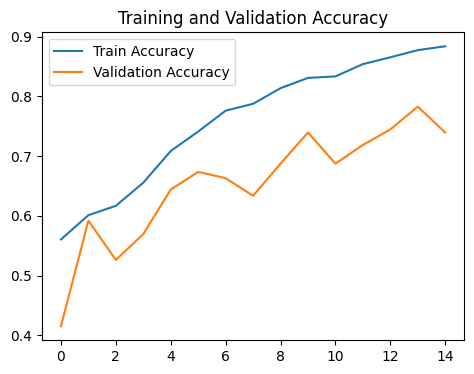

In [14]:
# Plot training & validation accuracy and loss
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()



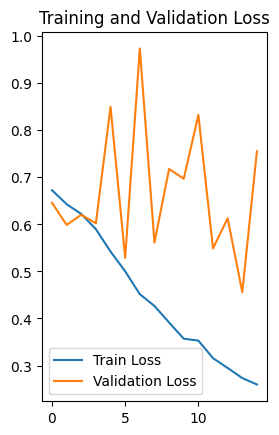

In [15]:

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.legend()

plt.show()

In [16]:
y_pred

array([0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1,
       1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0,
       0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0,
       0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1,
       1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0,
       0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1,

In [26]:
model.save('bone_fracture_cnn.h5')


In [25]:
from tensorflow.keras.preprocessing import image

def predict_image(img_path):
    img = image.load_img(img_path, target_size=(373,454), color_mode='grayscale')
    img_array = image.img_to_array(img) / 255.0
    img_array = np.expand_dims(img_array, axis=0)

    prediction = model.predict(img_array)
    if prediction[0] < 0.5:
        return "Fractured"
    else:
        return "Not fractured"

# Test with a new image
result = predict_image('/content/Bone fracture data/train/fractured/100-rotated3-rotated2-rotated2.jpg')
print(result)



1/1 [==============================] - 0s 46ms/step
Fractured
